Two machine learning methods that apply a similar strategy of dividing data into smaller and smaller portions to identify patterns that can be used for prediction. The knowledge is then presented in the form of logical structures that can be understood without any statistical knowledge. This aspect makes these models particularly useful for business strategy and process improvement. 

## The C.50 Decision Tree Algorithm

### *Strengths* 
**1)** An all-purpose classifier that does well on most problems 
**2)** Highly-automatic learning process can handle numeric or nominal features, missing data 
**3)** Uses only the most important features 
**4)** Can be used on data with relatively few training examples or a very large number 
**5)** Results in a model that can be interpreted without a mathematical background  (for relatively small trees) 
**6)** More efficient than other complex models 

### *Weaknesses*
**1)** Decision tree models are often biased toward splits on features having a large number of levels **2)** It is easy to overfit or underfit the model **3)** Can have trouble modeling some relationships due to reliance on axisparallel splits **4)** Small changes in training data can result in large changes to decision logic **5)** Large trees can be difficult to interpret and the decisions they make may seem counterintuitive

Entropy is used for measuring purity (how mixed the class values are). For example, suppose we have a partition of data with two classes: red (60 percent), and white (40 percent). We can calculate the entropy as:

In [13]:
 -0.60 * log2(0.60) - 0.40 * log2(0.40) 

[1] 0.9709506

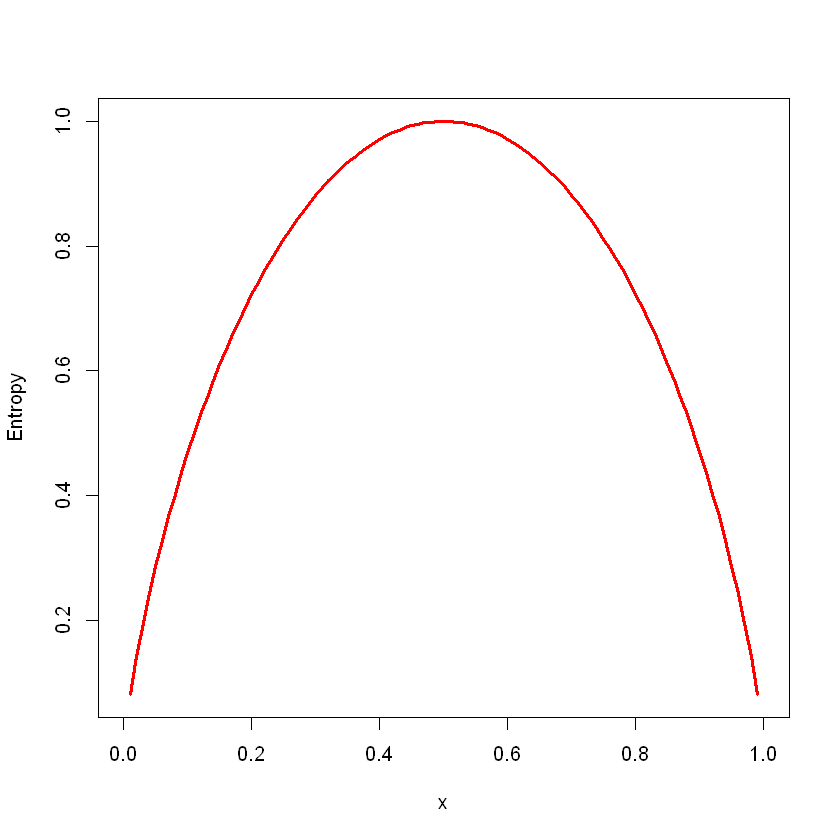

In [12]:
curve(-x * log2(x) - (1 - x) * log2(1 - x), col="red", xlab = "x", ylab = "Entropy", lwd=3) 

 As one class increasingly dominates the other, the entropy reduces to zero. 

#### Choosing the best split

Information Gain: is a calculated as the difference between the entropy in the segment before the split (S1), and the partitions resulting from the split (S2). Other commonly used criteria are Gini index, Chi-Squared statistic, and gain ratio. 

### Step One: Collect the Data

In [15]:
credit <- read.csv("../csv/credit.csv", stringsAsFactors = FALSE)

In [16]:
str(credit)

'data.frame':	1000 obs. of  21 variables:
 $ checking_balance    : chr  "< 0 DM" "1 - 200 DM" "unknown" "< 0 DM" ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : chr  "critical" "repaid" "critical" "repaid" ...
 $ purpose             : chr  "radio/tv" "radio/tv" "education" "furniture" ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : chr  "unknown" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ employment_length   : chr  "> 7 yrs" "1 - 4 yrs" "4 - 7 yrs" "4 - 7 yrs" ...
 $ installment_rate    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ personal_status     : chr  "single male" "female" "single male" "single male" ...
 $ other_debtors       : chr  "none" "none" "none" "guarantor" ...
 $ residence_history   : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property            : chr  "real estate" "real estate" "real estate" "building society savings" ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ..